# **PRML Lab 2**

> ### Mitul Agrawal

> ### B20AI021

Drive Link : [PRML Lab 2 Drive](https://drive.google.com/drive/folders/1U546g3QJ4GQrwrOj8P-rS1igTBP-s5cf?usp=sharing)

In [2]:
from google.colab import drive
#drive.mount('/content/drive/')

path = '/content/drive/My Drive/PRML/Lab 2/'

##Question 1
>Decision Tree from Scratch using Iterative Dichotomiser 3 Algorithm

###1) Pre-Processing & Visualization

#### Importing Data

In [380]:
import pandas as pd

df = pd.read_csv(path+'penguins.csv')

df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


####Cleaning Data

In [381]:
def remove_missing(df) : 
  remove = []
  for i, row in df.iterrows():
    if row.isna().values.any() : remove.append(i)
  df.drop(remove,axis=0,inplace=True)

def remove_mismatch(df) : 
  for col in df : 
    df.reset_index(drop=True, inplace=True)
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    remove = [i for i in range(len(df[col])) if s[i]!=st]
    df.drop(remove,axis=0,inplace=True)
      
print("Number of Rows Before :",df.shape[0])

remove_missing(df)

remove_mismatch(df)

print("Number of Rows After  :",df.shape[0])

df.head(4)

Number of Rows Before : 344
Number of Rows After  : 333


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


#### Visualizing Data

In [382]:
from matplotlib import pyplot as plt
import seaborn as sb

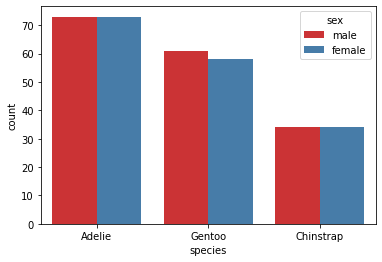

In [383]:
sb.countplot(x='species', hue = 'sex', data = df, palette = 'Set1')

Text(0.5, 1.0, 'Bill Length Desity')

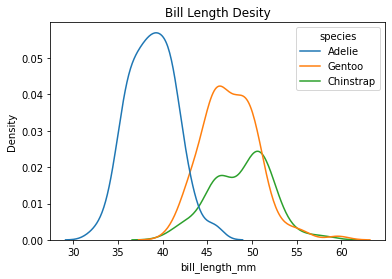

In [384]:
sb.kdeplot(x ='bill_length_mm', hue='species', data = df, color = 'black').set_title('Bill Length Desity')

Text(0.5, 1.0, 'Bill Depth Desity')

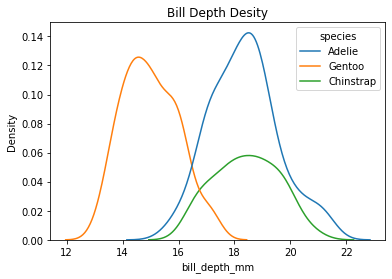

In [385]:
sb.kdeplot(x ='bill_depth_mm', hue='species', data = df, color = 'black').set_title('Bill Depth Desity')

Text(0.5, 1.0, 'Flipper Length Desity')

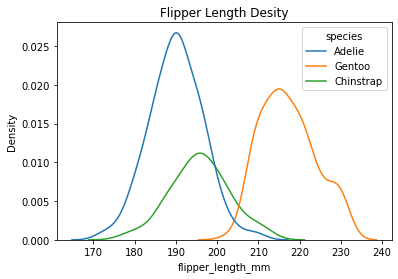

In [386]:
sb.kdeplot(x ='flipper_length_mm', hue='species', data = df, color = 'black').set_title('Flipper Length Desity')

Text(0.5, 1.0, 'Body Mass Desity')

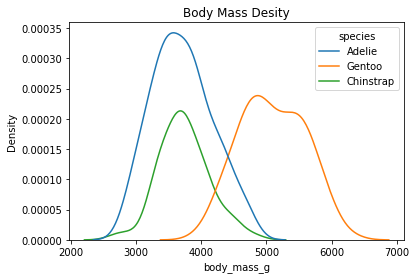

In [387]:
sb.kdeplot(x ='body_mass_g', hue='species', data = df, color = 'black').set_title('Body Mass Desity')

Text(0.5, 1.0, 'Bill Length vs Bill Depth')

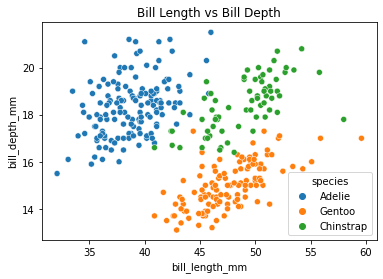

In [388]:
sb.scatterplot(x ='bill_length_mm', y='bill_depth_mm',hue='species', data = df, color = 'black').set_title('Bill Length vs Bill Depth')

Text(0.5, 1.0, 'Bill Length vs Flipper Length')

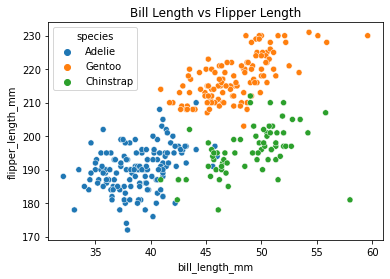

In [389]:
sb.scatterplot(x ='bill_length_mm', y='flipper_length_mm',hue='species', data = df, color = 'black').set_title('Bill Length vs Flipper Length')

Text(0.5, 1.0, 'Bill Length vs Body Mass')

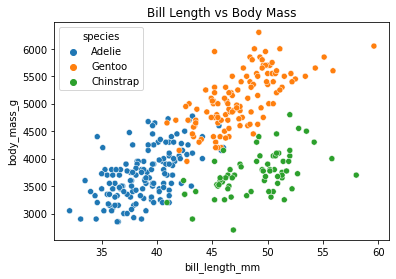

In [390]:
sb.scatterplot(x ='bill_length_mm', y='body_mass_g',hue='species', data = df, color = 'black').set_title('Bill Length vs Body Mass')

Text(0.5, 1.0, 'Bill Depth vs Flipper Length')

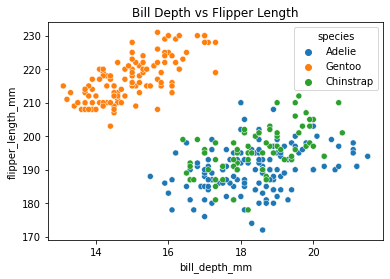

In [391]:
sb.scatterplot(x ='bill_depth_mm', y='flipper_length_mm',hue='species', data = df, color = 'black').set_title('Bill Depth vs Flipper Length')

Text(0.5, 1.0, 'Bill Depth vs Body Mass')

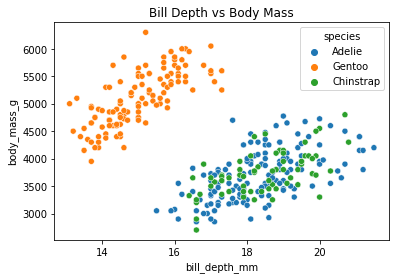

In [392]:
sb.scatterplot(x ='bill_depth_mm', y='body_mass_g',hue='species', data = df, color = 'black').set_title('Bill Depth vs Body Mass')

Text(0.5, 1.0, 'Flipper Length vs Body Mass')

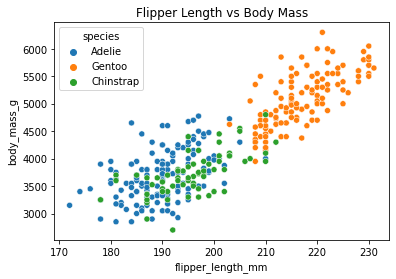

In [393]:
sb.scatterplot(x ='flipper_length_mm', y='body_mass_g',hue='species', data = df, color = 'black').set_title('Flipper Length vs Body Mass')

####Encoding Categorical Data

In [394]:
# Encode Label (ordinal type) for 1 column
def encode_label(df,col,order) : 
  for i,cell in enumerate(df[col]) : 
    try : 
      df.at[i,col] = order.index(df[col][i])
    except : 
      df.at[i,col] = -1

# Encode Label (ordinal type) for multiple columns  
def encode_labels(df,cols) : 
  for col in cols.keys() : 
    encode_label(df,col,cols[col])

# Encode One Hot (nominal type) for 1 column
def encode_onehot(df,col) :
  k = {}
  n = df[col].shape[0]
  unique = df[col].unique()
  for unq in unique : k[unq] = [0]*n
  for i in range(n) :
    k[df.at[i,col]][i] = 1
  for unq in unique : df[unq] = k[unq] 
  df.drop(col,1,inplace=True)

# Encode One Hot (nominal type) for multiple columns
def encode_onehots(df,cols) :
  for col in cols : encode_onehot(df,col)

# All in one encoding function
def encode(df,cols) : 
  for col in cols.keys() : 
    if(cols[col] is None) : encode_onehot(df,col)
    else : encode_label(df,col,cols[col])

def str_to_num(df) : 
  for col in df : 
    try : df[col] = pd.to_numeric(df[col])
    except : pass

# Although the categorical data here is nominal,
# I am using label encoding as this is for decision tree,
# where number of attributes matter really 
labels = {}
labels['species'] = ['Adelie','Gentoo','Chinstrap']
labels['island'] = ['Torgersen','Biscoe','Dream']
labels['sex'] = ['female','male']

encode(df,labels)

str_to_num(df)

df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,1,2007
1,0,0,39.5,17.4,186.0,3800.0,0,2007
2,0,0,40.3,18.0,195.0,3250.0,0,2007
3,0,0,36.7,19.3,193.0,3450.0,0,2007


####Splitting Data

In [395]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:]
y = df.iloc[:,0]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42) 

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Train Data   :",x_train.shape)
print("Train Labels :",y_train.shape)
print()
print("Test Data    :",x_test.shape)
print("Test Labels  :",y_test.shape)

Train Data   : (283, 7)
Train Labels : (283,)

Test Data    : (50, 7)
Test Labels  : (50,)


###2) Cost Function

In [396]:
def find_index(elem,arr) : 
  for i,a in enumerate(arr) : 
    if(a==elem) : return i
  return -1

# def gini_index_dataset(Y) :


def gini_index(A,Y) :
  unique = A.unique()
  classes = Y.unique()
  n = A.shape[0]
  u = len(unique)
  c = len(classes)
  gini = 0 
  sv = [[0]*c for i in range(u)]
  for i in range(n) :
    sv[find_index(A.iloc[i],unique)][find_index(Y.iloc[i],classes)]+= 1 
  sum_all = 0
  for i in range(u) : 
    sum_row = sum(sv[i])
    sum_sqr = sum([j**2 for j in sv[i]])
    sum_all+= sum_row
    gini = gini + sum_row * (1 - sum_sqr/(sum_row**2))
  gini = gini/sum_all
  return gini

print(gini_index(x_train.iloc[:,0],y_train))

0.3810749790351135


###3) Continuous Data to Categorical Data Function

In [397]:
# If number of distinct elements for an attribute > countinuous_threshold 
# Then it will be converted to binary categorical form 
countinuous_threshold = 10

def find_th(A,Y,start=0,end=1,n=11,depth=2) :

  min_A = A.min()
  max_A = A.max()

  if(depth==0) : 
    i = (start+end)/2
    th = min_A + (max_A-min_A)*i
    return th

  gini_min = 1
  i_min = 0
  step = (end-start)/(n-1)

  for i in [start+step*j for j in range(n)] : 
    A_cat = A.copy()
    th = min_A + (max_A-min_A)*i
    for j in range(A_cat.shape[0]) : 
      A_cat.iloc[j] = 0 if(A_cat.iloc[j]<th) else 1
    gini = gini_index(A_cat,Y)
    if(gini<gini_min) : 
      gini_min = gini
      i_min = i
    #print(i,gini)

  if(i_min<(start+step)) : return find_th(A,Y,start,start+step,n,depth-1)
  if(i_min>(end-step)) : return find_th(A,Y,end-step,end,n,depth-1)
  return find_th(A,Y,i_min-step,i_min+step,n,depth-1)   

def cont_to_cat(df,Y=None,th=None,iloc=None,loc=None,step=0.1,n=11,depth=2) :

  if iloc is None : 
    if loc is None : return
    iloc = df.columns.get_loc(loc)
  A = df.iloc[:,iloc]


  if(step>=0.5) : n = 4
  elif(step<=0) : n = 11
  elif(n==11) : n = 1+int(1/step)
  if(n<=3) : n = 4

  if th is None : th = find_th(A,Y,n=n,depth=depth)

  for j in range(df.shape[0]) : 
    df.iloc[j,iloc] = 0 if(df.iloc[j,iloc]<th) else 1
  df.iloc[:,iloc] = df.iloc[:,iloc].astype(int)
  return th

def cont_to_cat_all(X,Y,step=0.1,n=11,depth=2) : 
  global countinuous_threshold
  th = {}
  for col in X : 
    if(len(X[col].unique())>countinuous_threshold) : 
      col_i = X.columns.get_loc(col)
      th[col] = cont_to_cat(X,Y=Y,iloc=col_i,step=step,n=n,depth=depth)
  return th

def visualize_th(th,iloc) : 
  sb.kdeplot(x =x_train.columns[iloc], hue='species', data = df, color = 'black').set_title(f'Threshold for {x_train.columns[iloc]}')
  plt.plot([th,th],plt.gca().get_ylim(), linewidth=2,color="black")

cont_to_cat_th = cont_to_cat_all(x_train,y_train)

for atr in cont_to_cat_th.keys() : 
  print(f"Threshold for {atr} : {cont_to_cat_th[atr]}")

x_train.head()

Threshold for bill_length_mm : 42.55
Threshold for bill_depth_mm : 16.46
Threshold for flipper_length_mm : 206.22
Threshold for body_mass_g : 4509.0


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,0,1,0,0,0,2009
1,1,1,1,1,1,1,2009
2,1,1,0,1,1,0,2008
3,1,0,1,0,0,1,2007
4,1,0,1,0,0,0,2009


####Visualize Thresholds

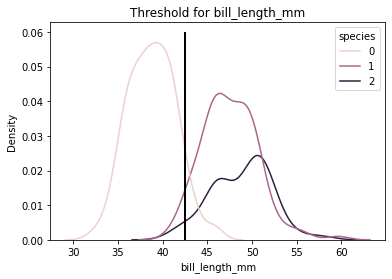

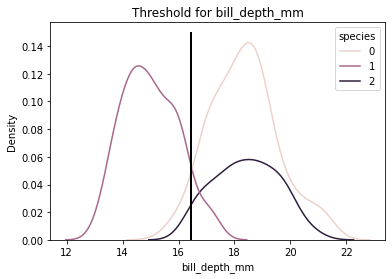

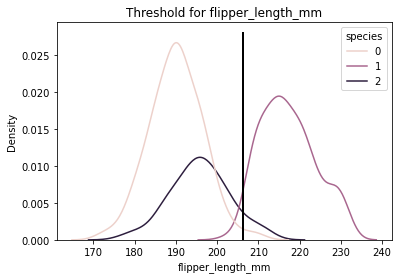

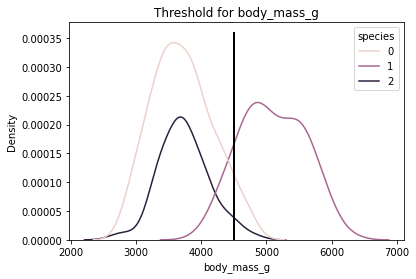

In [398]:
for atr in cont_to_cat_th.keys() : 
  visualize_th(cont_to_cat_th[atr],x_train.columns.get_loc(atr))
  plt.show()

###4-6) Training & Prediction Functions (in class) 

In [399]:
class Node : 

  def __init__(self,dep=-1) : 
    self.child = {}
    self.A = None
    self.Y = None
    self.leaf = False
    self.depth = dep+1


class DecisionTree : 

  def __init__(self) :
    self.root = Node()
    self.cont_to_cat_th = {}


  def get_best_split(self,X,Y) : 
    gini_min = 1 
    col_min = None
    for col in X:
      gini = gini_index(X[col],Y)
      if(gini<gini_min) : 
        gini_min = gini
        col_min = col
    return col_min,gini_min


  def split(self,node,A) :
    node.A = A.name
    for val in A.unique() : 
      node.child[val] = Node(node.depth) 


  def info_gain(self,gini_A,Y) : 
    n = Y.shape[0]
    sum_sqr = sum([j**2 for j in Y.value_counts()])
    gini = 1 - sum_sqr/(n**2)
    gain = gini - gini_A
    return gain

    
  def grow(self,node,X,Y,depth_max,gain_min) : 

    node.Y = Y.mode().iloc[0]
    
    if (node.depth == depth_max) :
      node.leaf = True
      return
    if(len(X.columns)==0) : 
      node.leaf = True
      return  

    A_best,gini_A = self.get_best_split(X,Y) 

    if(self.info_gain(gini_A,Y)<gain_min) : 
      node.leaf = True
      return
    
    self.split(node,X[A_best])

    children = node.child.keys()
    ind_mat = [[] for i in range(len(children))]
    for i,x in X[A_best].iteritems() :
      ind_mat[find_index(x,children)].append(i)

    for i,child in enumerate(children) : 
      x = X.iloc[ind_mat[i]].copy()
      x.drop(A_best,axis=1,inplace=True)
      x.reset_index(drop=True, inplace=True)
      y = Y.iloc[ind_mat[i]].copy()
      y.reset_index(drop=True, inplace=True)

      self.grow(node.child[child],x,y,depth_max,gain_min)


  def train(self,X,Y,depth_max=None,gain_min=0) :
    Xt = X.copy()
    Yt = Y.copy()
    #self.cont_to_cat_th = cont_to_cat_all(Xt,Yt)
    self.cont_to_cat_th = cont_to_cat_th 

    self.grow(self.root,Xt,Yt,depth_max,gain_min) 


  def travel(self,node,x) : 
    if(node.leaf) : return node.Y
    if(x.loc[node.A] not in node.child.keys()) : return node.Y
    return self.travel(node.child[x.loc[node.A]],x)


  def predict(self,X) : 
    Xp = X.copy() 
    for atr in self.cont_to_cat_th.keys() :
      cont_to_cat(Xp,th=self.cont_to_cat_th[atr],loc=atr)
    predictions = [-1]*(Xp.shape[0])
    for i,x in Xp.iterrows() :
      predictions[i] = self.travel(self.root,x)
    return predictions


  def print_node(self,node) : 
    print("Prediction Here :",node.Y)
    if(node.leaf) : 
      print("LEAF NODE")
      return
    print("Check for next node :",node.A)
    print()
    for val in node.child.keys() : 
      print("Entering",node.A, val)
      print()
      self.print_node(node.child[val])
      print()
      print("Exiting",node.A,val)
      print()


  def print_tree(self) : 
    self.print_node(self.root)

###5) Training

In [400]:
import time

now = time.time()

# Scratch Tree with Max Depth 1
DT_Scratch_1 = DecisionTree()
DT_Scratch_1.train(x_train,y_train,depth_max=1,gain_min=0.05) 

T_1_Tr = time.time()-now 

now = time.time()

# Scratch Tree with Max Depth 2
DT_Scratch_2 = DecisionTree()
DT_Scratch_2.train(x_train,y_train,depth_max=2,gain_min=0.05) 

T_2_Tr = time.time()-now 

now = time.time()

# Scratch Tree with Max Depth 3
DT_Scratch_3 = DecisionTree()
DT_Scratch_3.train(x_train,y_train,depth_max=3,gain_min=0.05) 

T_3_Tr = time.time()-now 

now = time.time()

# Inbuilt Tree 
from sklearn.tree import DecisionTreeClassifier as DTC
DT_Inbuilt= DTC()
DT_Inbuilt.fit(x_train,y_train)

T_I_Tr = time.time()-now 

#### Visualizing Decision Tree

In [401]:
from IPython.core.display import display, HTML
from pyvis.network import Network
g = Network(notebook=True)

def print_node(node,p,c,s="") : 
  g.add_node(c)
  if(p!=-1) : g.add_edge(p,c,title=s)
  cc = c+1
  for child in node.child.keys() : 
    cc = print_node(node.child[child],c,cc,f"{node.A} = {child}")
  return cc

def print_tree(root) : 
  print_node(root,-1,0)
  g.show("tree.html")
  display(HTML("tree.html"))

print_tree(DT_Scratch_3.root)

###6) Prediciton

In [402]:
# Scratch Tree Predictions

now = time.time()
Predictions_Scratch_1 = DT_Scratch_1.predict(x_test)
T_1_Pr = time.time()-now

now = time.time()
Predictions_Scratch_2 = DT_Scratch_2.predict(x_test)
T_2_Pr = time.time()-now

now = time.time()
Predictions_Scratch_3 = DT_Scratch_3.predict(x_test)
T_3_Pr = time.time()-now

# Inbuilt Tree Predictions

now = time.time()
Predictions_Inbuilt = DT_Inbuilt.predict(x_test)
T_I_Pr = time.time()-now

Predictions_Inbuilt = list(Predictions_Inbuilt)
y_test = list(y_test)

print("Scratch 1 :",Predictions_Scratch_1)
print("Scratch 2 :",Predictions_Scratch_2)
print("Scratch 3 :",Predictions_Scratch_3)
print("Inbuilt   :",Predictions_Inbuilt)
print("ACTUAL    :",y_test)

Scratch 1 : [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]
Scratch 2 : [0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2]
Scratch 3 : [0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2]
Inbuilt   : [2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2]
ACTUAL    : [0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2]


###7) Evaluation

####Average

In [403]:
def average(actual,prediction):
  acc = 0 
  for i in range(len(actual)) : 
    acc+= int(actual[i]==prediction[i])
  acc = acc/len(actual)
  return int(100*round(acc,2)) 

print("Average | SCRATCH (1):",average(y_test,Predictions_Scratch_1),"%")
print("Average | SCRATCH (2):",average(y_test,Predictions_Scratch_2),"%")
print("Average | SCRATCH (3):",average(y_test,Predictions_Scratch_3),"%")
print()
print("Average | INBUILT    :",average(y_test,Predictions_Inbuilt),"%")

Average | SCRATCH (1): 72 %
Average | SCRATCH (2): 94 %
Average | SCRATCH (3): 98 %

Average | INBUILT    : 76 %


####Class-Wise Average

In [404]:
def class_wise_average(actual,prediction):
  acc = {}
  n = {}
  for i in range(len(actual)) : 
    c = actual[i]
    if c in acc.keys() : 
      acc[c] = acc[c] + int(actual[i]==prediction[i])
      n[c] = n[c] + 1
    else : 
      acc[c] = int(actual[i]==prediction[i])
      n[c] = 1
  for i in acc.keys() : 
    acc[i] = int(round(acc[i]/n[i],3)*100)
  return acc

def print_cw(cw) : 
  for i in cw.keys() : 
    s = labels['species'][i]
    print(f"\t\t{s}{' '*(10-len(s))} : {cw[i]} %")
  print()

print("Class-Wise Average | SCRATCH (1) :")
print_cw(class_wise_average(y_test,Predictions_Scratch_1))
print("Class-Wise Average | SCRATCH (2) :")
print_cw(class_wise_average(y_test,Predictions_Scratch_2))
print("Class-Wise Average | SCRATCH (3) :")
print_cw(class_wise_average(y_test,Predictions_Scratch_3))
print()
print("Class-Wise Average | INBUILT :")
print_cw(class_wise_average(y_test,Predictions_Inbuilt))

Class-Wise Average | SCRATCH (1) :
		Adelie     : 100 %
		Chinstrap  : 0 %
		Gentoo     : 100 %

Class-Wise Average | SCRATCH (2) :
		Adelie     : 91 %
		Chinstrap  : 92 %
		Gentoo     : 100 %

Class-Wise Average | SCRATCH (3) :
		Adelie     : 100 %
		Chinstrap  : 92 %
		Gentoo     : 100 %


Class-Wise Average | INBUILT :
		Adelie     : 47 %
		Chinstrap  : 100 %
		Gentoo     : 100 %



####Training Time

In [405]:
def ms(t) : 
  return str(int(t*(10**3)))+" ms"

print("Train Time | SCRATCH (1) :",ms(T_1_Tr))
print("Train Time | SCRATCH (2) :",ms(T_2_Tr))
print("Train Time | SCRATCH (3) :",ms(T_3_Tr))
print("Train Time | INBUILT     :",ms(T_I_Tr))
print()
print("Test Time  | SCRATCH (1) :",ms(T_1_Pr))
print("Test Time  | SCRATCH (2) :",ms(T_2_Pr))
print("Test Time  | SCRATCH (3) :",ms(T_3_Pr))
print("Test Time  | INBUILT     :",ms(T_I_Pr))

Train Time | SCRATCH (1) : 35 ms
Train Time | SCRATCH (2) : 71 ms
Train Time | SCRATCH (3) : 117 ms
Train Time | INBUILT     : 3 ms

Test Time  | SCRATCH (1) : 91 ms
Test Time  | SCRATCH (2) : 97 ms
Test Time  | SCRATCH (3) : 74 ms
Test Time  | INBUILT     : 2 ms


##Question 2
>Regression using Decision Tree

###1) Preprocessing

####Importing Data

In [366]:
import pandas as pd

df = pd.read_excel(path+'ENB2012_data.xlsx')

df.head(4)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55


####Cleaning Data

In [367]:
def remove_missing(df) : 
  remove = []
  for i, row in df.iterrows():
    if row.isna().values.any() : remove.append(i)
  df.drop(remove,axis=0,inplace=True)

def remove_mismatch(df) : 
  for col in df : 
    df.reset_index(drop=True, inplace=True)
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    remove = [i for i in range(len(df[col])) if s[i]!=st]
    df.drop(remove,axis=0,inplace=True)
      
print("Number of Rows Before :",df.shape[0])

remove_missing(df)

remove_mismatch(df)

print("Number of Rows After  :",df.shape[0])

Number of Rows Before : 768
Number of Rows After  : 768


####Splitting Data

In [368]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

def train_val_test(x,y,train_size=-1,val_size=-1,test_size=-1) : 

  if(train_size==-1) : train_size = 1-val_size-test_size
  if(val_size==-1) : val_size = 1-train_size-test_size
  if(test_size==-1) : test_size = 1-train_size-val_size

  x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=train_size,random_state=42)

  x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,train_size=(val_size/(1-train_size)),random_state=42)

  return x_train,x_val,x_test,y_train,y_val,y_test

x_train,x_val,x_test,y_train,y_val,y_test = train_val_test(x,y,train_size=0.7,val_size=0.1)  

x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Train Data         :",x_train.shape)
print("Train Labels       :",y_train.shape)
print()
print("Validation Data    :",x_val.shape)
print("Validation Labels  :",y_val.shape)
print()
print("Test Data          :",x_test.shape)
print("Test Labels        :",y_test.shape)

Train Data         : (537, 8)
Train Labels       : (537,)

Validation Data    : (77, 8)
Validation Labels  : (77,)

Test Data          : (154, 8)
Test Labels        : (154,)


###2) Finding Hyper Parameters

####My Method

In [369]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_poisson_deviance as MPD

n = 5

def best_n(d,n=3) :
  new = {}
  for j in range(n) :
    i_min = None
    for i in d.keys() :  
      if(i_min is None or d[i]<d[i_min]) : 
        i_min = i
    new[i_min] = d[i_min]
    del d[i_min]
  return new


def find_max_dep() : 

  global x_train,x_val,y_train,y_val,n

  md = {}

  for i in range(2,9) : 

    DT = DTR(max_depth=i)

    DT.fit(x_train,y_train)

    Predictions = DT.predict(x_val)

    md[(i)] = MSE(y_val,Predictions)

  return best_n(md,n)


def find_min_imp(params,start=0,end=0.1,points=5,depth=3) : 

  global x_train,x_val,y_train,y_val,n

  mi = {}

  mse_min = None
  i_min = 0
  step = (end-start)/(points-1)

  for i in [start+step*j for j in range(n)] :  
    
    for md in params : 

      DT = DTR(max_depth=md, min_impurity_decrease=i)

      DT.fit(x_train,y_train)

      Predictions = DT.predict(x_val)

      mse = MSE(y_val,Predictions)
      if(depth==1) : mi[(md,i)] = MSE(y_val,Predictions)

      if mse_min is None or mse<mse_min :
        mse_min = mse
        i_min = i

  
  st = i_min - step
  ed = i_min + step
  if(st<start) : st = start
  if(ed>end) : ed = end


  if(depth==1) : return best_n(mi,n)

  return find_min_imp(params,st,ed,points,depth-1)


def find_ccp_alp(params,start=0,end=0.25,points=5,depth=3) : 

  global x_train,x_val,y_train,y_val,n

  ca = {}

  mse_min = None
  i_min = 0
  step = (end-start)/(points-1)

  for i in [start+step*j for j in range(n)] :  
    
    for md,mi in params : 

      DT = DTR(max_depth=md, min_impurity_decrease=mi, ccp_alpha=i)

      DT.fit(x_train,y_train)

      Predictions = DT.predict(x_val)

      mse = MSE(y_val,Predictions)
      if(depth==1) : ca[(md,mi,i)] = MSE(y_val,Predictions)

      if mse_min is None or mse<mse_min :
        mse_min = mse
        i_min = i

  
  st = i_min - step
  ed = i_min + step
  if(st<start) : st = start
  if(ed>end) : ed = end


  if(depth==1) : return best_n(ca,n)

  return find_ccp_alp(params,st,ed,points,depth-1)


def find_min_spl(params,start=2,end=50,points=5,depth=3) : 

  global x_train,x_val,y_train,y_val,n

  ms = {}

  mse_min = None
  i_min = 0
  step = (end-start)/(points-1)

  for i in [start+step*j for j in range(n)] :  

    i = int(i)
    
    for md,mi,ca in params : 

      DT = DTR(max_depth=md, min_impurity_decrease=mi, ccp_alpha=ca, min_samples_split=i)

      DT.fit(x_train,y_train)

      Predictions = DT.predict(x_val)

      mse = MSE(y_val,Predictions)
      if(depth==1) : ms[(md,mi,ca,i)] = MSE(y_val,Predictions)

      if mse_min is None or mse<mse_min :
        mse_min = mse
        i_min = i

  
  st = int(i_min - step)
  ed = int(i_min + step)
  if(st<start) : st = start
  if(ed>end) : ed = end


  if(depth==1) : return best_n(ms,n)

  return find_min_spl(params,st,ed,points,depth-1)


def select(best,i,minimum=True) : 
    m = None
    new = {}
    for key in best.keys() : 
      if minimum : 
        if m is None or key[i]<m : m = key[i]
      else : 
        if m is None or key[i]>m : m = key[i]
    for key in best.keys() : 
      if key[i]==m : new[key] = best[key]
    return new


def find_best(params) : 

  global x_train,x_val,y_train,y_val,n

  best = {}

  eval = {"squared_error":MSE, "friedman_mse":MSE, "absolute_error":MAE, "poisson":MPD}

  for error in ["squared_error", "friedman_mse", "absolute_error", "poisson"] : 
    
    temp = {}

    for md,mi,ca,ms in params : 

      DT = DTR(max_depth=md, min_impurity_decrease=mi, ccp_alpha=ca, min_samples_split=ms, criterion=error)

      DT.fit(x_train,y_train)

      Predictions = DT.predict(x_val)

      temp[(md,mi,ca,ms)] = eval[error](y_val,Predictions)

    error_best = best_n(temp,n=1)
    for key in error_best.keys() :
      md,mi,ca,ms = key
      best[(md,mi,ca,ms,error)] = error_best[key]

  best = select(best,0,True)
  best = select(best,1,False)
  best = select(best,2,False)
  best = select(best,3,False)

  return list(best.keys())[0][:-1]


now = time.time()

md = find_max_dep()
mi = find_min_imp(md.keys(),points=10,depth=2)
ca = find_ccp_alp(mi.keys(),points=10,depth=3)
ms = find_min_spl(ca.keys(),points=10,depth=2)

max_dep,min_imp,ccp_alp,min_spl = find_best(ms)

T_Mine = time.time() - now


print("Mean Squared Error :")
for i in md : 
  print(f"Max Depth = {i}  :",md[i])
print()

print("Mean Squared Error :")
for i in mi : 
  print(f"Max Depth = {i[0]} | Min Impurity Decrease = {i[1]}  :",mi[i])
print()

print("Mean Squared Error :")
for i in ca : 
  print(f"Max Depth = {i[0]} | Min Impurity Decrease = {i[1]} | CCP Alpha = {i[2]}  :",ca[i])
print()

print("Mean Squared Error :")
for i in ms : 
  print(f"Max Depth = {i[0]} | Min Impurity Decrease = {i[1]} | CCP Alpha = {i[2]} | Min Samples Split = {i[3]} :",ms[i])
print()

print("Best Parameters : ")
print(f"\t Max Depth = {max_dep} \n\t Min Impurity Decrease = {min_imp} \n\t CCP Alpha = {ccp_alp} \n\t Min Samples Split = {min_spl}")

Mean Squared Error :
Max Depth = 6  : 0.28554907869826446
Max Depth = 7  : 0.29951831547043356
Max Depth = 8  : 0.32099154796740575
Max Depth = 5  : 1.040831434869955
Max Depth = 4  : 2.8402065920591832

Mean Squared Error :
Max Depth = 8 | Min Impurity Decrease = 0.0024691358024691358  : 0.2535581338107043
Max Depth = 7 | Min Impurity Decrease = 0.0024691358024691358  : 0.2535581338107044
Max Depth = 8 | Min Impurity Decrease = 0.003703703703703704  : 0.2599530041170863
Max Depth = 7 | Min Impurity Decrease = 0.003703703703703704  : 0.2599530041170864
Max Depth = 8 | Min Impurity Decrease = 0.0012345679012345679  : 0.27708755401312013

Mean Squared Error :
Max Depth = 8 | Min Impurity Decrease = 0.0012345679012345679 | CCP Alpha = 0.0020576131687242796  : 0.2305006723537666
Max Depth = 8 | Min Impurity Decrease = 0.0024691358024691358 | CCP Alpha = 0.0027434842249657062  : 0.2499650014004152
Max Depth = 7 | Min Impurity Decrease = 0.0024691358024691358 | CCP Alpha = 0.0027434842249657

####Visualize

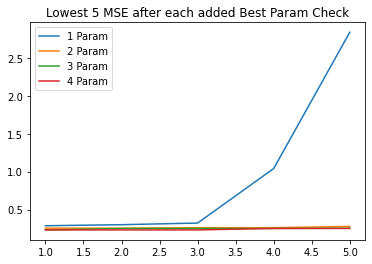

In [370]:
from matplotlib import pyplot as plt 

x_vals = list(range(1,n+1))

plt.plot(x_vals,list(md.values()),label="1 Param")
plt.plot(x_vals,list(mi.values()),label="2 Param")
plt.plot(x_vals,list(ca.values()),label="3 Param")
plt.plot(x_vals,list(ms.values()),label="4 Param")
plt.legend()
plt.title("Lowest 5 MSE after each added Best Param Check")
plt.show()

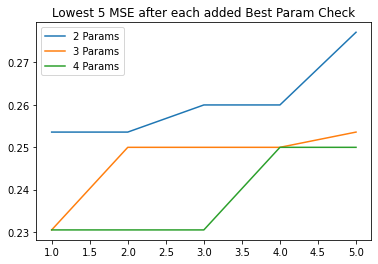

In [371]:
from matplotlib import pyplot as plt 

x_vals = list(range(1,n+1))

plt.plot(x_vals,list(mi.values()),label="2 Params")
plt.plot(x_vals,list(ca.values()),label="3 Params")
plt.plot(x_vals,list(ms.values()),label="4 Params")
plt.legend()
plt.title("Lowest 5 MSE after each added Best Param Check")
plt.show()

####Time Taken

In [372]:
print("TIME Taken by My Method :",T_Mine,"seconds")

TIME Taken by My Method : 0.9257633686065674 seconds


###3) Evaluation

In [373]:
from sklearn.metrics import r2_score as R2

E = {"Mean Square Error":MSE, "Mean Absolute Error":MAE, "Mean Poisson Deviance":MPD, "R2 Score":R2}

####5-Fold Cross Validation

#####Merging Training and Validation Data

In [374]:
print(x_train.shape)
print(x_val.shape)
x_validate = pd.concat([x_train,x_val],ignore_index=True)
y_validate = pd.concat([y_train,y_val],ignore_index=True)
print(x_validate.shape)
print(y_validate.shape)
x_validate.reset_index(drop=True, inplace=True)
y_validate.reset_index(drop=True, inplace=True)

(537, 8)
(77, 8)
(614, 8)
(614,)


##### Splitting Data into 5 Groups

In [375]:
def split_5(x,y) : 
  data = [dict.fromkeys(['x','y']) for i in range(5)]
  data[0]['x'] = x.copy()
  data[0]['y'] = y.copy() 
  for i in range(4) : 
    size = 1/(5-i)
    data[i]['x'],data[i+1]['x'],data[i]['y'],data[i+1]['y'] = train_test_split(data[i]['x'],data[i]['y'],train_size=size,random_state=42)
  return data

data = split_5(x_validate,y_validate)

for i in range(5) : 
  data[i]['x'].reset_index(drop=True, inplace=True)
  data[i]['y'].reset_index(drop=True, inplace=True)
  print(f"Group {i+1} X :",data[i]['x'].shape)
  print(f"Group {i+1} Y :",data[i]['y'].shape)

Group 1 X : (122, 8)
Group 1 Y : (122,)
Group 2 X : (123, 8)
Group 2 Y : (123,)
Group 3 X : (123, 8)
Group 3 Y : (123,)
Group 4 X : (123, 8)
Group 4 Y : (123,)
Group 5 X : (123, 8)
Group 5 Y : (123,)


##### Cross Validation

In [379]:
E_Mine = {}
E_Default = {} 

for err in E.keys() :
  E_Mine[err] = 0
  E_Default[err] = 0

for i in range(5) : 

  x_tr = pd.concat([data[j]['x'].copy() for j in range(5) if j!=i],ignore_index=True)
  y_tr = pd.concat([data[j]['y'].copy() for j in range(5) if j!=i],ignore_index=True)
  x_vl = data[i]['x'].copy()
  y_vl = data[i]['y'].copy()

  DT_Mine = DTR(max_depth=max_dep, ccp_alpha=ccp_alp,min_impurity_decrease=min_imp , min_samples_split=min_spl)
  DT_Default = DTR()

  DT_Mine.fit(x_tr,y_tr)
  DT_Default.fit(x_tr,y_tr)

  Predictions_Mine = DT_Mine.predict(x_vl)
  Predictions_Default = DT_Default.predict(x_vl)

  for err in E.keys() : 
    E_Mine[err] = E_Mine[err] + E[err](y_vl,Predictions_Mine)/5
    E_Default[err] = E_Default[err] + E[err](y_vl,Predictions_Default)/5

for err in E.keys() :
  print(err,"-\n")
  print("My Method Search   :",round(E_Mine[err],3))
  print("Default Parameters :",round(E_Default[err],3))
  print("\n")

Mean Square Error -

My Method Search   : 0.312
Default Parameters : 0.433


Mean Absolute Error -

My Method Search   : 0.365
Default Parameters : 0.402


Mean Poisson Deviance -

My Method Search   : 0.015
Default Parameters : 0.019


R2 Score -

My Method Search   : 0.997
Default Parameters : 0.996




####Testing

In [377]:
DT_Mine = DTR(max_depth=max_dep, ccp_alpha=ccp_alp,min_impurity_decrease=min_imp , min_samples_split=min_spl)
DT_Default = DTR()

DT_Mine.fit(x_train,y_train)
DT_Default.fit(x_train,y_train)

Predictions_Mine = DT_Mine.predict(x_test)
Predictions_Default = DT_Default.predict(x_test)

for err in E.keys() : 
  E_Mine = E[err](y_test,Predictions_Mine)
  E_Default = E[err](y_test,Predictions_Default)
  print(err,"-\n")
  print("My Method Search   :",round(E_Mine,3))
  print("Default Parameters :",round(E_Default,3))
  print("\n")

Mean Square Error -

My Method Search   : 0.194
Default Parameters : 0.345


Mean Absolute Error -

My Method Search   : 0.322
Default Parameters : 0.39


Mean Poisson Deviance -

My Method Search   : 0.008
Default Parameters : 0.013


R2 Score -

My Method Search   : 0.998
Default Parameters : 0.996


